In [2]:
#import the libraries that we need, NumPy for mathematical operations and 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.stats as ss
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
#Create a variable corresponding to the file name. This file must be uploaded to Google Colab. If working offline, this file must be in the same directory as the .py file. 
infile = "Day2CountryInfo2018_ADV.csv"

#Create empty lists to store our data
country_list = []
medal_list = []
lat_list = []
long_list = []
gdp_list = []
pop_list = []

#Create a second set of lists to store data for countries without medals
country_list_none = []
medal_list_none = []
lat_list_none = []
long_list_none = []
gdp_list_none = []
pop_list_none = []

#These lines open "infile", which we have assigned to our desired file name. 
#The "r" means we want to read this file.  
#This information is all saved as the variable "csv_file"
with open (infile, 'r') as csv_file:
 
    #The first line of the csv file is not important information for us, it's just the headers
    #The following command processes that first line so when we loop over the rest it's not included
    header = csv_file.readline()

    #This for loop loops over all of the lines in "csv_file" which we assigned all of the data in the file to
    for line in csv_file:
        
        #The split function will split up lines based on whatever you designate.
        #Here we are designating to split each line at the commas, creating three variables 
        country_info = line.split(",")

        #Add the country name to the country list
        country_list.append(country_info[0])
        
        #For each country, we want to tally up the total number of medals, so we create a variable for the tally
        medal_total = 0
        
        #The number of gold, silver and bronze medal are variables 1, 2, and 3 in the "country_info" list
        #This loops over each of those
        for i in country_info[1:4]:
            #This line adds the number of gold silver or bronze medals to the medal total
            medal_total += int(i)

        #This checks if the country won any medals. If not, its data gets added to the none lists
        if medal_total == 0:
            lat_list_none.append(float(country_info[4]))
            long_list_none.append(float(country_info[5]))
            gdp_list_none.append(float(country_info[6]))
            pop_list_none.append(float(country_info[7]))

        #Otherwise, if the countries did win some medals, their data gets added to the other lists
        elif medal_total > 0:
            medal_list.append(medal_total)
            lat_list.append(float(country_info[4]))
            long_list.append(float(country_info[5]))
            gdp_list.append(float(country_info[6]))
            pop_list.append(float(country_info[7]))


#To calculate the gpd per capita per (per 5000 pop.) we have to divide the values from the gpd and population lists
#Turning lists into arrays can make math much faster. 

#Here for "gdp_per_capita" we calculated it in one line.
gdp_per_capita = np.array(gdp_list)/np.array(pop_list)*5000

#For comparison, I calculted gpd per capita of the non-medaling countries by individually looping over each value in the lists.
#This is more to code (and more room to mess up) and is also less efficient computationally
gdp_per_capita_none = []
for i in range(len(gdp_list_none)):
    gdp_per_capita_none.append(gdp_list_none[i]/pop_list_none[i]*5000)

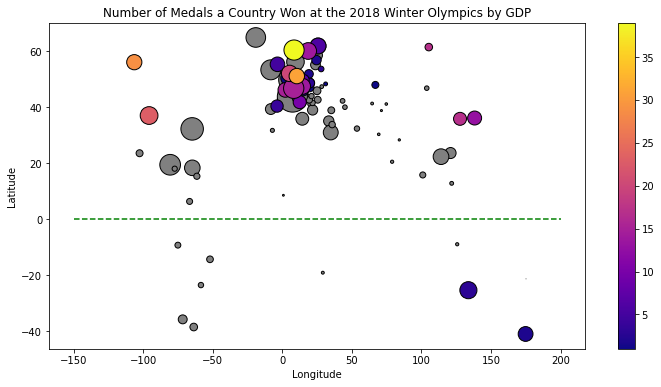

In [4]:
#This line create a new figure and simply sets its dimensions to be a bit larger so it's easier to read
plt.figure(figsize=(12,6))
#plot the countries without medals first in grey
plt.scatter(long_list_none, lat_list_none, c='grey', s=gdp_per_capita_none,edgecolors='black')
#You can change the size and color of the scatter points to describe other variables. 
#Here we set the color "c" to correspond with the number of medals won and the size "s" to the gdp per capita
plt.scatter(long_list, lat_list, c=medal_list, s=gdp_per_capita, cmap='plasma',edgecolors='black')
plt.hlines((0),-150,200,linestyles='dashed',color='g')
plt.title("Number of Medals a Country Won at the 2018 Winter Olympics by GDP")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig('Day_2_HW.png')

In [19]:
#In order to determine which factor is most correlated with Olympic success, we should run a linear regression
#To graph this, we have to define a linear equation

def fit_eq(x, m, b):
    return m*x + b

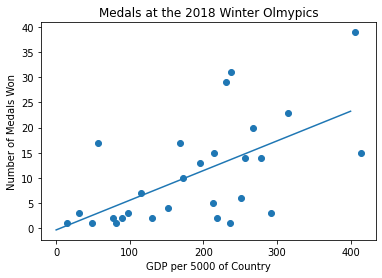

R^2: 0.362796494593953


In [30]:
#This scipy.stats function takes in a list of x variables and a list of y varibles, then computes a linear grepession
#Output of the function is: slope, y-intercept, r value (correlation), p value, and the standard error
gdp_slope, gdp_intercept, gdp_r_value, gdp_p_value, gdp_std_err = ss.linregress(gdp_per_capita, medal_list)

#To plot the line, we need a series of x variables. For linspace, you enter the minimum value (0), 
#the maximum value (400) and the number of points you want evenly spaced (100, this number doesn't really matter for our case)
xvals = np.linspace(0, 400, 100)
#to get yvalues to plot for our line, plug the values into our fit function (fit_eq) and plug in the slope and intercept calcuated from ss.linregress
yvals = fit_eq(xvals, gdp_slope, gdp_intercept)
#plot the raw data ploints as a scatter plot
plt.scatter(np.abs(gdp_per_capita), medal_list)
#plot the generatede x and yvals for the line
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('GDP per 5000 of Country')
plt.ylabel('Number of Medals Won')
plt.show()
#calculate the R squared value
r_squared = gdp_r_value**2
#print() can only take in string variables, so we turn r_squared into a string with the str() function
print('R^2: ' + str(r_squared))

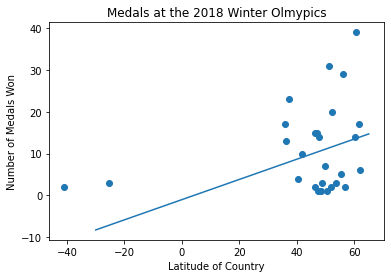

R^2: 0.04087455147931968


In [31]:
#This is the same as the previous cell except it uses the latitude data
lat_slope, lat_intercept, lat_r_value, lat_p_value, lat_std_err = ss.linregress(np.abs(lat_list), medal_list)


xvals = np.linspace(-30, 65, 100)
yvals = fit_eq(xvals, lat_slope, lat_intercept)

plt.scatter(lat_list, medal_list)
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('Latitude of Country')
plt.ylabel('Number of Medals Won')
plt.show()
r_squared = lat_r_value**2
print('R^2: ' + str(r_squared))


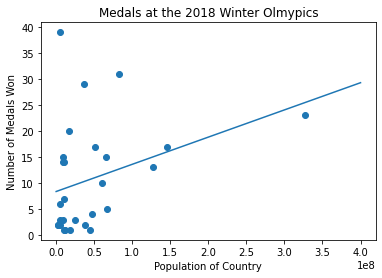

R^2: 0.11295525578389548


In [32]:
#This is the same as the previous cell except it uses the population data
pop_slope, pop_intercept, pop_r_value, pop_p_value, pop_std_err = ss.linregress(pop_list, medal_list)

xvals = np.linspace(0, 4e8, 100)
yvals = fit_eq(xvals, pop_slope, pop_intercept)
plt.scatter(pop_list, medal_list)
plt.plot(xvals, yvals)
plt.title('Medals at the 2018 Winter Olmypics')
plt.xlabel('Population of Country')
plt.ylabel('Number of Medals Won')
plt.show()
r_squared = pop_r_value**2
print('R^2: ' + str(r_squared))


In [33]:
#linregress function is unable to compute a multivariable function, so we are using LinearRegression from sklearn
#Create a model object
model = LinearRegression()

#instead of taking in the 3 input variables (population, gdp/capita, and latitude) as 3 separate lists, the dimensions need to be transposed
#ie, there needs to a list of each country that had three elements (population, gdp/capita, and latitude)
X = np.transpose([gdp_per_capita, lat_list, pop_list])
y = medal_list

#The fit function here is where the magic happens. This is what actually calculates the multivariable regression
#The output of this regression is stored within the "model" object. If you continue to study Python you will learn more about classes and objects
model.fit(X, y)
#To access the  R squared, coefficients and intercept for the regression that were calculated above, you need the following commands
R_squared = model.score(X, y)
coeffs = model.coef_
intercept = model.intercept_

#Let's see our results
print(R_squared)
print(coeffs)
print(intercept)

0.5516993918173996
[6.13622850e-02 1.53764928e-01 4.19688865e-08]
-9.416326227172158


In [28]:
#To predict the medals in 2014, we need to read in a new data file. This will be done 2 ways, the first in this cell.

#Pandas is much faster at loading cvs files. See the panda documentation linked on the bootcamp website
#This function reads in a csv and creates a dataframe object. Dataframes are like arrays but you can index them with titles and strings
data2014 = pd.read_csv('Day3CountryInfo2014_ADV.csv')

#Create two new columns in our dataframe object: Total_Medals and GDP per Capita (5000). 
#These are cacluated with the other columns in our dataframe
data2014['Total_Medals'] = data2014["Gold"]+ data2014["Silver"]+data2014["Bronze"]
data2014['GDP per Capita (5000)'] = data2014["GDP (2014)"]/data2014["Population (2014)"]*5000

#Samples is a portion of the dataframe (which contains the 2014 data) that we want to be the input for our multivariable regression, the GDP, latitude, and population
Samples = data2014[['GDP per Capita (5000)','Latitudes', 'Population (2014)']]

#This line is where the sample data is input into our multivariable regression
#model.predict is using the same model generated in the previous cell with LinearRegression
predictions = model.predict(Samples)

#This is simply a loop that prints out the results. Russia is a bit of an outlier because it was a host country at these games.
for i in data2014.index:
  print(data2014["Country"][i])
  print('predicted medals: '+ str(int(predictions[i])))
  print('actual medals: '+ str(data2014["Gold"][i]+data2014["Silver"][i]+data2014["Bronze"][i]))
  print()

Russia
predicted medals: 10
actual medals: 30

Norway
predicted medals: 31
actual medals: 26

Canada
predicted medals: 16
actual medals: 25

United States
predicted medals: 26
actual medals: 28

Netherlands
predicted medals: 15
actual medals: 24

Germany
predicted medals: 16
actual medals: 19

Switzerland
predicted medals: 25
actual medals: 11

Belarus
predicted medals: 1
actual medals: 6

Austria
predicted medals: 14
actual medals: 17

France
predicted medals: 13
actual medals: 15

Poland
predicted medals: 4
actual medals: 6

South Korea
predicted medals: 6
actual medals: 8

Sweden
predicted medals: 18
actual medals: 15

Czech Republic
predicted medals: 4
actual medals: 8

Slovenia
predicted medals: 5
actual medals: 8

Japan
predicted medals: 12
actual medals: 8

Finland
predicted medals: 15
actual medals: 5

Great Britain
predicted medals: 15
actual medals: 5

Latvia
predicted medals: 3
actual medals: 9

Ukraine
predicted medals: 0
actual medals: 2

Slovakia
predicted medals: 3
actua

In [ ]:
new_country_list = []
new_medal_list = []
new_lat_list = []
new_long_list = []
new_gdp_list = []
new_pop_list = []


with open ('Day3CountryInfo2014_ADV.csv', 'r') as csv_file:
    junk = csv_file.readline()
    for line in csv_file:
        
        new_country_info = line.split(',')
        
        for i in range(len(new_country_info)):
            new_country_info[i] = new_country_info[i].strip()

        new_country_list.append(str(new_country_info[0]))
        
        medal_total = 0
        
        for i in new_country_info[1:4]:
            medal_total += int(i)
        
        new_medal_list.append(medal_total)
        
        new_lat_list.append(float(new_country_info[4]))
        new_long_list.append(float(new_country_info[5]))
        new_gdp_list.append(float(new_country_info[6]))
        new_pop_list.append(float(new_country_info[7]))
        
new_gdp_per_capita = []

for i in range(len(new_gdp_list)):
    new_gdp_per_capita.append(new_gdp_list[i]/new_pop_list[i]*5000)


def medal_model(x, a, b, c, d):
  return a*x[0] + b*x[1] + c*x[2] + d

parameters = np.array([new_gdp_per_capita, new_lat_list, new_pop_list])
predicted_medals = medal_model(parameters, coeffs[0], coeffs[1], coeffs[2], intercept)

for i in range(predicted_medals.shape[0]):
  print(new_country_list[i])
  print('predicted medals: '+ str(int(predicted_medals[i])))
  print('actual medals: ' + str(new_medal_list[i]))
  print()